#  **Project Title:**
"Loan Approval Prediction Model Using Demographic and Credit Data"










# **Problem Statement**:
"Predict whether a loan applicant will be approved for a loan or not based on their personal details, financial information, and loan-related factors."



# **1.Understand The Data**

In [464]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


#  **Features:**
**person_age**: Age of the individual applying for the loan.

**person_gender**: Gender of the applicant (e.g., male, female).

**person_education**: Education level of the applicant (e.g., High School, Bachelor, Master).

**person_income**: Annual income of the applicant.

**person_emp_exp**: Number of years of employment experience.

**person_home_ownership**: Type of home ownership (e.g., RENT, OWN, MORTGAGE).

**loan_amnt**: Amount of the loan being applied for.

**loan_intent**: Purpose of the loan (e.g., PERSONAL, EDUCATION, MEDICAL).

**loan_int_rate**: Interest rate on the loan.

**loan_percent_income**: Percentage of the applicant’s income that the loan amount represents.

**cb_person_cred_hist_length**: Length of the applicant’s credit history (in years).

**credit_score**: Credit score of the applicant.

**previous_loan_defaults_on_file**: Indicates if the applicant had any previous loan defaults (Yes/No).

**loan_status**: Status of the loan (0 for not approved, 1 for approved). This is the target variable.








# **Objectives:**
**Loan Approval Prediction**: To predict whether a loan will be approved or denied based on the applicant's personal, financial, and loan-related data.



In [465]:
# load the data
df = pd.read_csv('loan_data.csv')
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


*  view the first 10 rows of a DataFrame.

In [466]:
df.head(10)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
6,26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,1
7,24.0,female,High School,95550.0,5,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585,No,1
8,24.0,female,Associate,100684.0,3,RENT,35000.0,PERSONAL,8.90,0.35,2.0,544,No,1
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1


*  view the first 10 rows of a DataFrame.

In [467]:
df.tail(10)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
44990,31.0,male,Master,136832.0,9,RENT,12319.0,PERSONAL,16.92,0.09,7.0,722,No,1
44991,24.0,male,High School,37786.0,0,MORTGAGE,13500.0,EDUCATION,13.43,0.36,4.0,612,No,1
44992,23.0,female,Bachelor,40925.0,0,RENT,9000.0,PERSONAL,11.01,0.22,4.0,487,No,1
44993,27.0,female,High School,35512.0,4,RENT,5000.0,PERSONAL,15.83,0.14,5.0,505,No,1
44994,24.0,female,Associate,31924.0,2,RENT,12229.0,MEDICAL,10.70,0.38,4.0,678,No,1
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1
44999,24.0,male,High School,51609.0,1,RENT,6665.0,DEBTCONSOLIDATION,17.05,0.13,3.0,628,No,1


* check information of DataFrame

In [468]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

* checks for duplicate rows in the DataFrame

In [469]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
44995,False
44996,False
44997,False
44998,False


* Check for any missing values:

In [470]:
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


 * Analyzing data in a DataFrame, and its purpose is to retrieve all the distinct values from a specific column

In [471]:
df['person_education'].unique()

array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
      dtype=object)

In [472]:
df['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [473]:
df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [474]:
df['previous_loan_defaults_on_file'].unique()

array(['No', 'Yes'], dtype=object)

* convert categorical data into numerical values

In [475]:
import pandas as pd
# Mapping ordinal values to numbers
ordinal_mapping = {'High School': 1, 'Bachelor':2,'Master':3,'Associate':4,'Doctorate':5}
df['person_education'] = df['person_education'].map(ordinal_mapping)
ordinal_mapping = {'RENT': 1, 'OWN':2,'MORTGAGE':3,'OTHER':4}
df['person_home_ownership'] = df['person_home_ownership'].map(ordinal_mapping)
ordinal_mapping = {'PERSONAL': 1, 'EDUCATION':2,'MEDICAL':3,'VENTURE':4,'HOMEIMPROVEMENT':5,'DEBTCONSOLIDATION':6}
df['loan_intent'] = df['loan_intent'].map(ordinal_mapping)
ordinal_mapping = {'Yes': 1, 'No':2}
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].map(ordinal_mapping)
df


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,3,71948.0,0,1,35000.0,1,16.02,0.49,3.0,561,2,1
1,21.0,female,1,12282.0,0,2,1000.0,2,11.14,0.08,2.0,504,1,0
2,25.0,female,1,12438.0,3,3,5500.0,3,12.87,0.44,3.0,635,2,1
3,23.0,female,2,79753.0,0,1,35000.0,3,15.23,0.44,2.0,675,2,1
4,24.0,male,3,66135.0,1,1,35000.0,3,14.27,0.53,4.0,586,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,4,47971.0,6,1,15000.0,3,15.66,0.31,3.0,645,2,1
44996,37.0,female,4,65800.0,17,1,9000.0,5,14.07,0.14,11.0,621,2,1
44997,33.0,male,4,56942.0,7,1,2771.0,6,10.02,0.05,10.0,668,2,1
44998,29.0,male,2,33164.0,4,1,12000.0,2,13.23,0.36,6.0,604,2,1


* LabelEncoder to convert categorical columns like"person_gender" into numerical format.

In [476]:
label=LabelEncoder()
df["person_gender"]=label.fit_transform(df["person_gender"])

In [477]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,3,71948.0,0,1,35000.0,1,16.02,0.49,3.0,561,2,1
1,21.0,0,1,12282.0,0,2,1000.0,2,11.14,0.08,2.0,504,1,0
2,25.0,0,1,12438.0,3,3,5500.0,3,12.87,0.44,3.0,635,2,1
3,23.0,0,2,79753.0,0,1,35000.0,3,15.23,0.44,2.0,675,2,1
4,24.0,1,3,66135.0,1,1,35000.0,3,14.27,0.53,4.0,586,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,4,47971.0,6,1,15000.0,3,15.66,0.31,3.0,645,2,1
44996,37.0,0,4,65800.0,17,1,9000.0,5,14.07,0.14,11.0,621,2,1
44997,33.0,1,4,56942.0,7,1,2771.0,6,10.02,0.05,10.0,668,2,1
44998,29.0,1,2,33164.0,4,1,12000.0,2,13.23,0.36,6.0,604,2,1


# **3.Descriptive Data**
* To quickly get a summary of important statistical details about the numeric columns in a DataFrame.



In [479]:
df.describe()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
count,45000.000000,45000.000000,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,0.552022,2.465044,8.031905e+04,5.410333,1.895111,9583.157556,3.323622,11.006606,0.139725,5.867489,632.608756,1.492044,0.222222
std,6.045108,0.497292,1.182487,8.042250e+04,6.063532,0.965008,6314.886691,1.672702,2.978808,0.087212,3.879702,50.435865,0.499942,0.415744
min,20.000000,0.000000,1.000000,8.000000e+03,0.000000,1.000000,500.000000,1.000000,5.420000,0.000000,2.000000,390.000000,1.000000,0.000000
25%,24.000000,0.000000,1.000000,4.720400e+04,1.000000,1.000000,5000.000000,2.000000,8.590000,0.070000,3.000000,601.000000,1.000000,0.000000
50%,26.000000,1.000000,2.000000,6.704800e+04,4.000000,1.000000,8000.000000,3.000000,11.010000,0.120000,4.000000,640.000000,1.000000,0.000000
75%,30.000000,1.000000,4.000000,9.578925e+04,8.000000,3.000000,12237.250000,5.000000,12.990000,0.190000,8.000000,670.000000,2.000000,0.000000
max,144.000000,1.000000,5.000000,7.200766e+06,125.000000,4.000000,35000.000000,6.000000,20.000000,0.660000,30.000000,850.000000,2.000000,1.000000


# **4.Data Visualization**
* A histogram is used to show the distribution of data in a dataset.

array([[<Axes: title={'center': 'person_gender'}>,
        <Axes: title={'center': 'person_education'}>,
        <Axes: title={'center': 'person_income'}>],
       [<Axes: title={'center': 'person_home_ownership'}>,
        <Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'loan_int_rate'}>],
       [<Axes: title={'center': 'loan_percent_income'}>,
        <Axes: title={'center': 'previous_loan_defaults_on_file'}>,
        <Axes: title={'center': 'loan_status'}>]], dtype=object)

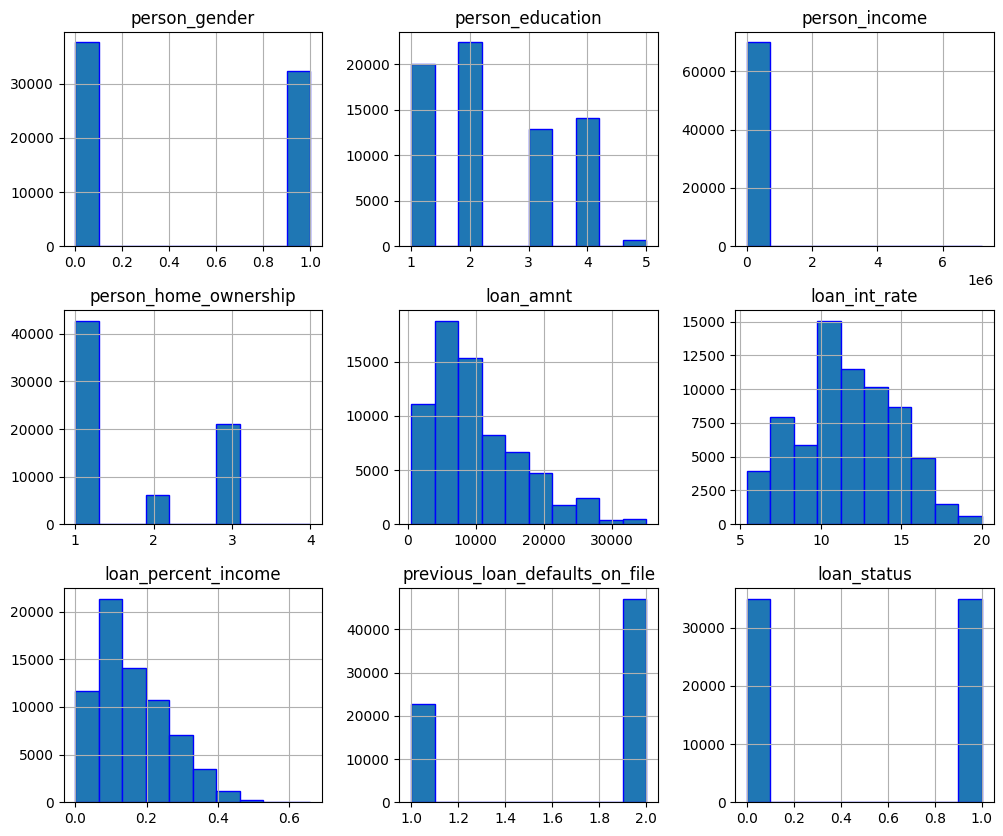

In [506]:
df.hist(edgecolor='b',figsize=(12,10))

 * It creates a bar chart that shows how many times each unique value in the "target" column appears.


<Axes: xlabel='loan_status', ylabel='count'>

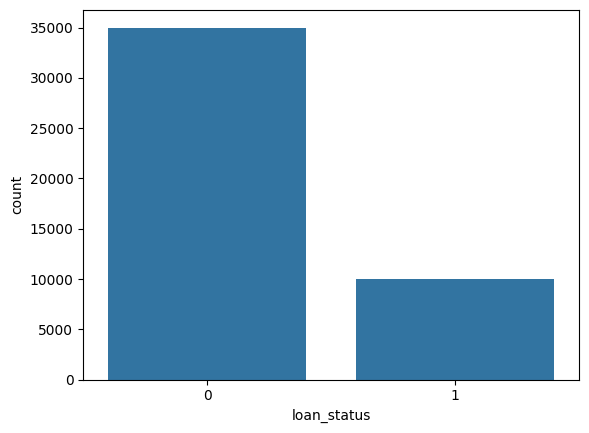

In [481]:
sns.countplot(x='loan_status',data=df)

* This handles imbalanced data by oversampling the minority class using SMOTE (Synthetic Minority Oversampling Technique). It ensures the model gets balanced data for better training and performance, particularly in classification problems with unequal class distributions.

In [482]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target (y)
X = df.drop('loan_status', axis=1)
y = df['loan_status']



# Applying SMOTE for oversampling
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)


X_resampled=pd.DataFrame(X_resampled,columns=X.columns)
y_resampled=pd.Series(y_resampled,name='loan_status')
# concatenate  X_resampled is a DataFrame and y_resampled is series to allow
df=pd.concat([X_resampled,y_resampled],axis=1)
df



,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.000000,0,3,71948.000000,0,1,35000.000000,1,16.020000,0.490000,3.000000,561,2,1
1,21.000000,0,1,12282.000000,0,2,1000.000000,2,11.140000,0.080000,2.000000,504,1,0
2,25.000000,0,1,12438.000000,3,3,5500.000000,3,12.870000,0.440000,3.000000,635,2,1
3,23.000000,0,2,79753.000000,0,1,35000.000000,3,15.230000,0.440000,2.000000,675,2,1
4,24.000000,1,3,66135.000000,1,1,35000.000000,3,14.270000,0.530000,4.000000,586,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,31.308295,0,1,58632.677976,5,2,7220.332447,3,11.350065,0.120000,7.353364,622,2,1
69996,27.067654,1,3,15500.407609,6,1,3013.985195,1,9.759852,0.191865,4.440592,609,2,1
69997,26.606303,0,1,45602.814911,3,1,14348.424271,4,15.054132,0.316968,5.818909,624,2,1
69998,21.476427,1,3,43908.037190,0,2,5000.000000,3,14.019876,0.110000,2.476427,609,2,1


* To ensure the oversampling process (SMOTE) worked correctly and the classes are now balanced, which helps improve the model's training and performance.









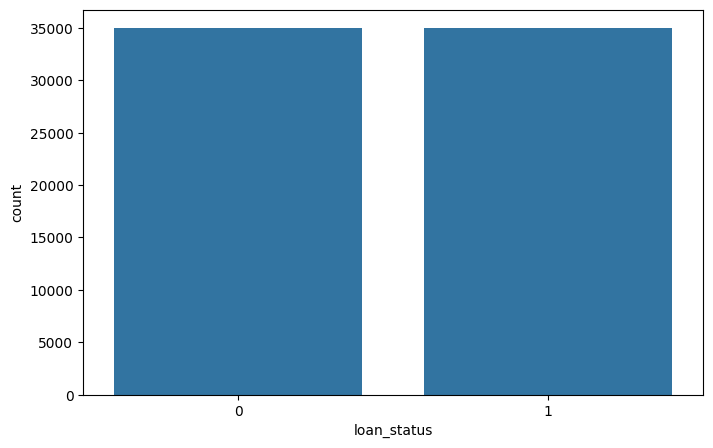

loan_status
1    35000
0    35000
Name: count, dtype: int64


In [483]:
# Plot the class distribution after oversampling
# Convert the oversampled target to a Pandas Series
y_resampled_series = pd.Series(y_resampled)

# Plot the class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=y_resampled_series)
plt.show()

# Display the count of each class
print(y_resampled_series.value_counts())


# **5. Correlation Analysis**
* it find the correlation between columns in a dataset. Correlation measures how strongly two variables are related:

In [484]:
correlation=df.corr()


* The heatmap helps you easily spot correlations between variables at a glance. Darker colors indicate stronger relationships, while lighter colors indicate weaker relationships.

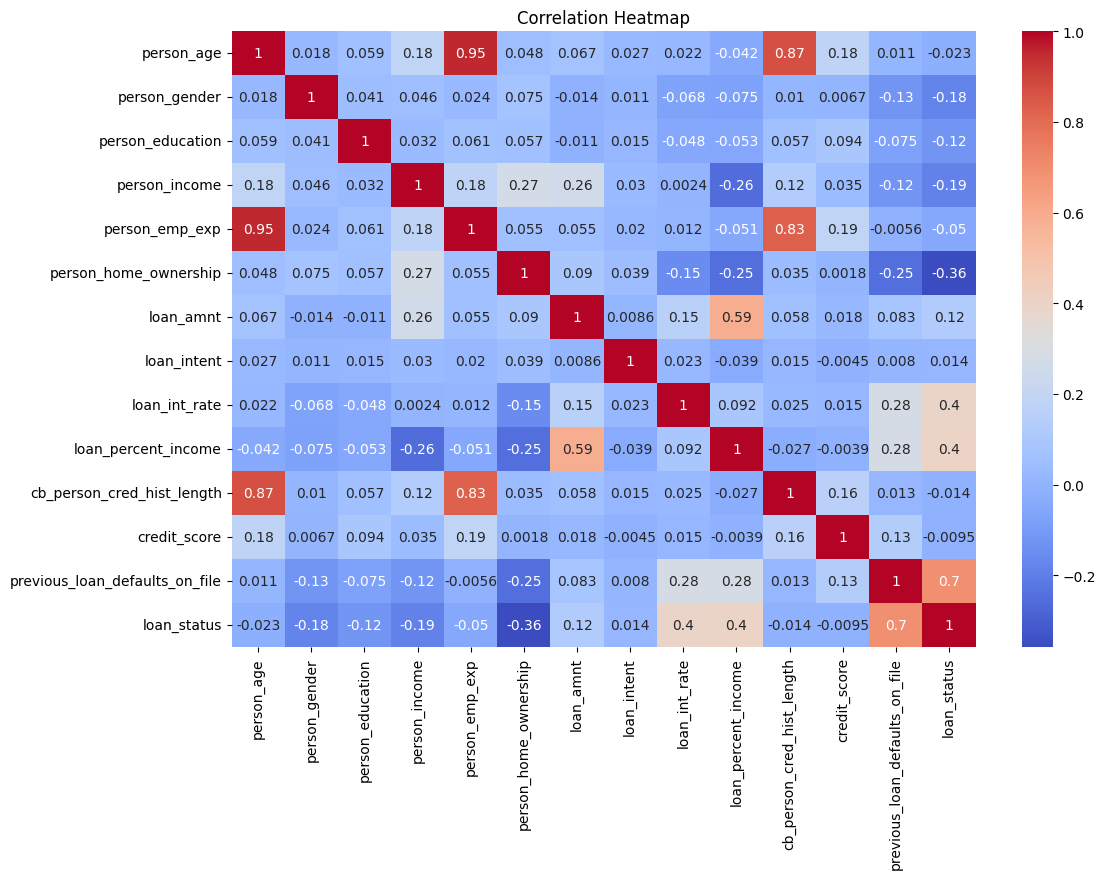

In [485]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation,annot=True,cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

* Dropping columns based on their correlation with the target variable helps to simplify the model by removing features that aren't useful for prediction.

In [486]:
df.drop(["person_age"], inplace=True,axis=1)
df.drop(["person_emp_exp"], inplace=True, axis=1)
df.drop(['loan_intent'],inplace=True,axis=1)
df.drop(["cb_person_cred_hist_length"],inplace=True,axis=1)
df.drop(["credit_score"],inplace=True,axis=1)
df


,person_gender,person_education,person_income,person_home_ownership,loan_amnt,loan_int_rate,loan_percent_income,previous_loan_defaults_on_file,loan_status
0,0,3,71948.000000,1,35000.000000,16.020000,0.490000,2,1
1,0,1,12282.000000,2,1000.000000,11.140000,0.080000,1,0
2,0,1,12438.000000,3,5500.000000,12.870000,0.440000,2,1
3,0,2,79753.000000,1,35000.000000,15.230000,0.440000,2,1
4,1,3,66135.000000,1,35000.000000,14.270000,0.530000,2,1
...,...,...,...,...,...,...,...,...,...
69995,0,1,58632.677976,2,7220.332447,11.350065,0.120000,2,1
69996,1,3,15500.407609,1,3013.985195,9.759852,0.191865,2,1
69997,0,1,45602.814911,1,14348.424271,15.054132,0.316968,2,1
69998,1,3,43908.037190,2,5000.000000,14.019876,0.110000,2,1


In [487]:
df.shape

(70000, 9)

# **6. Outlier Detection**

* it is is useful for visually inspecting the distributions and identifying outliers in multiple numerical columns of a DataFrame.


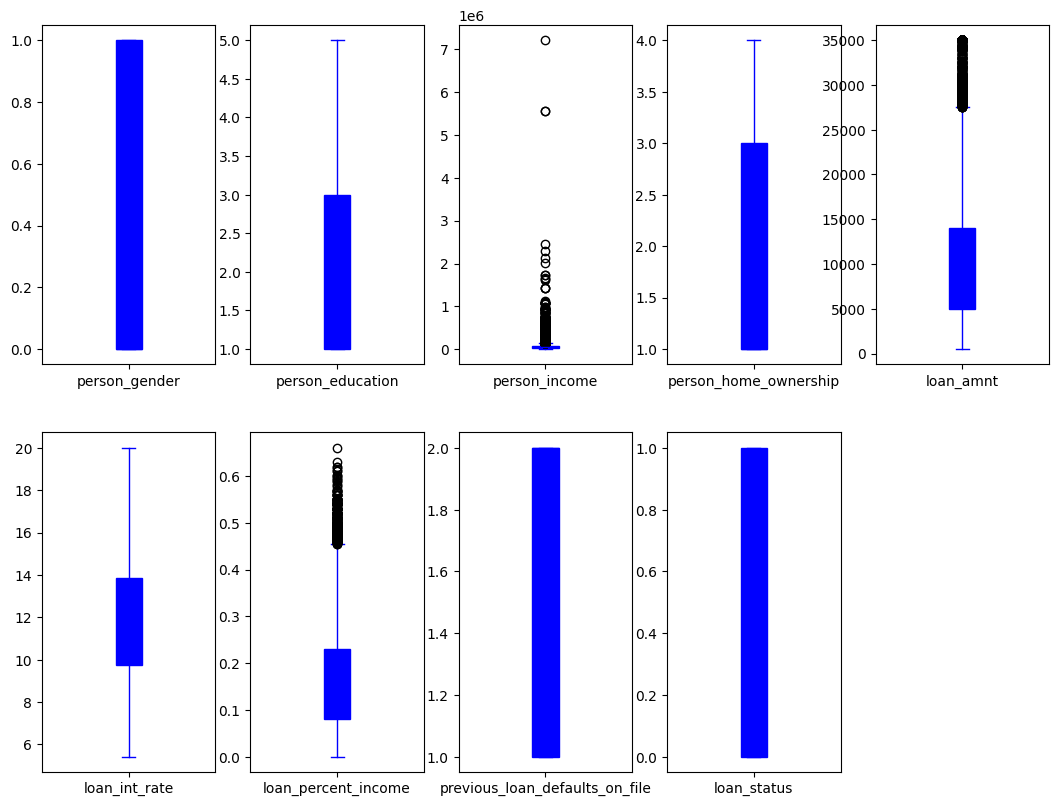

In [488]:
df.plot(kind='box',subplots=True,layout=(3,5),figsize=(13,15),color='blue',patch_artist=True)
plt.show()

# **7. Feature Engineer**
* it helps reduce skewness

In [489]:
data=np.log(df+1)

* creates a histogram to visualize the distribution of the log-transformed data.


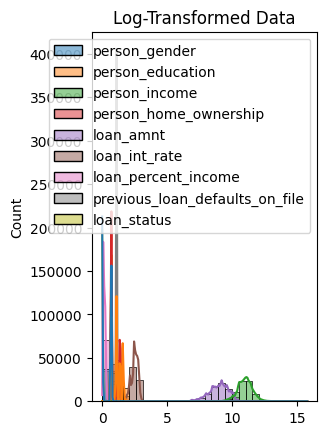

In [490]:
# Plotting log-transformed data distribution
plt.subplot(1,2,2)
sns.histplot(data, bins=30, kde=True)
plt.title("Log-Transformed Data")
plt.show()

* creates a histogram to visualize the distribution of the log-transformed data.


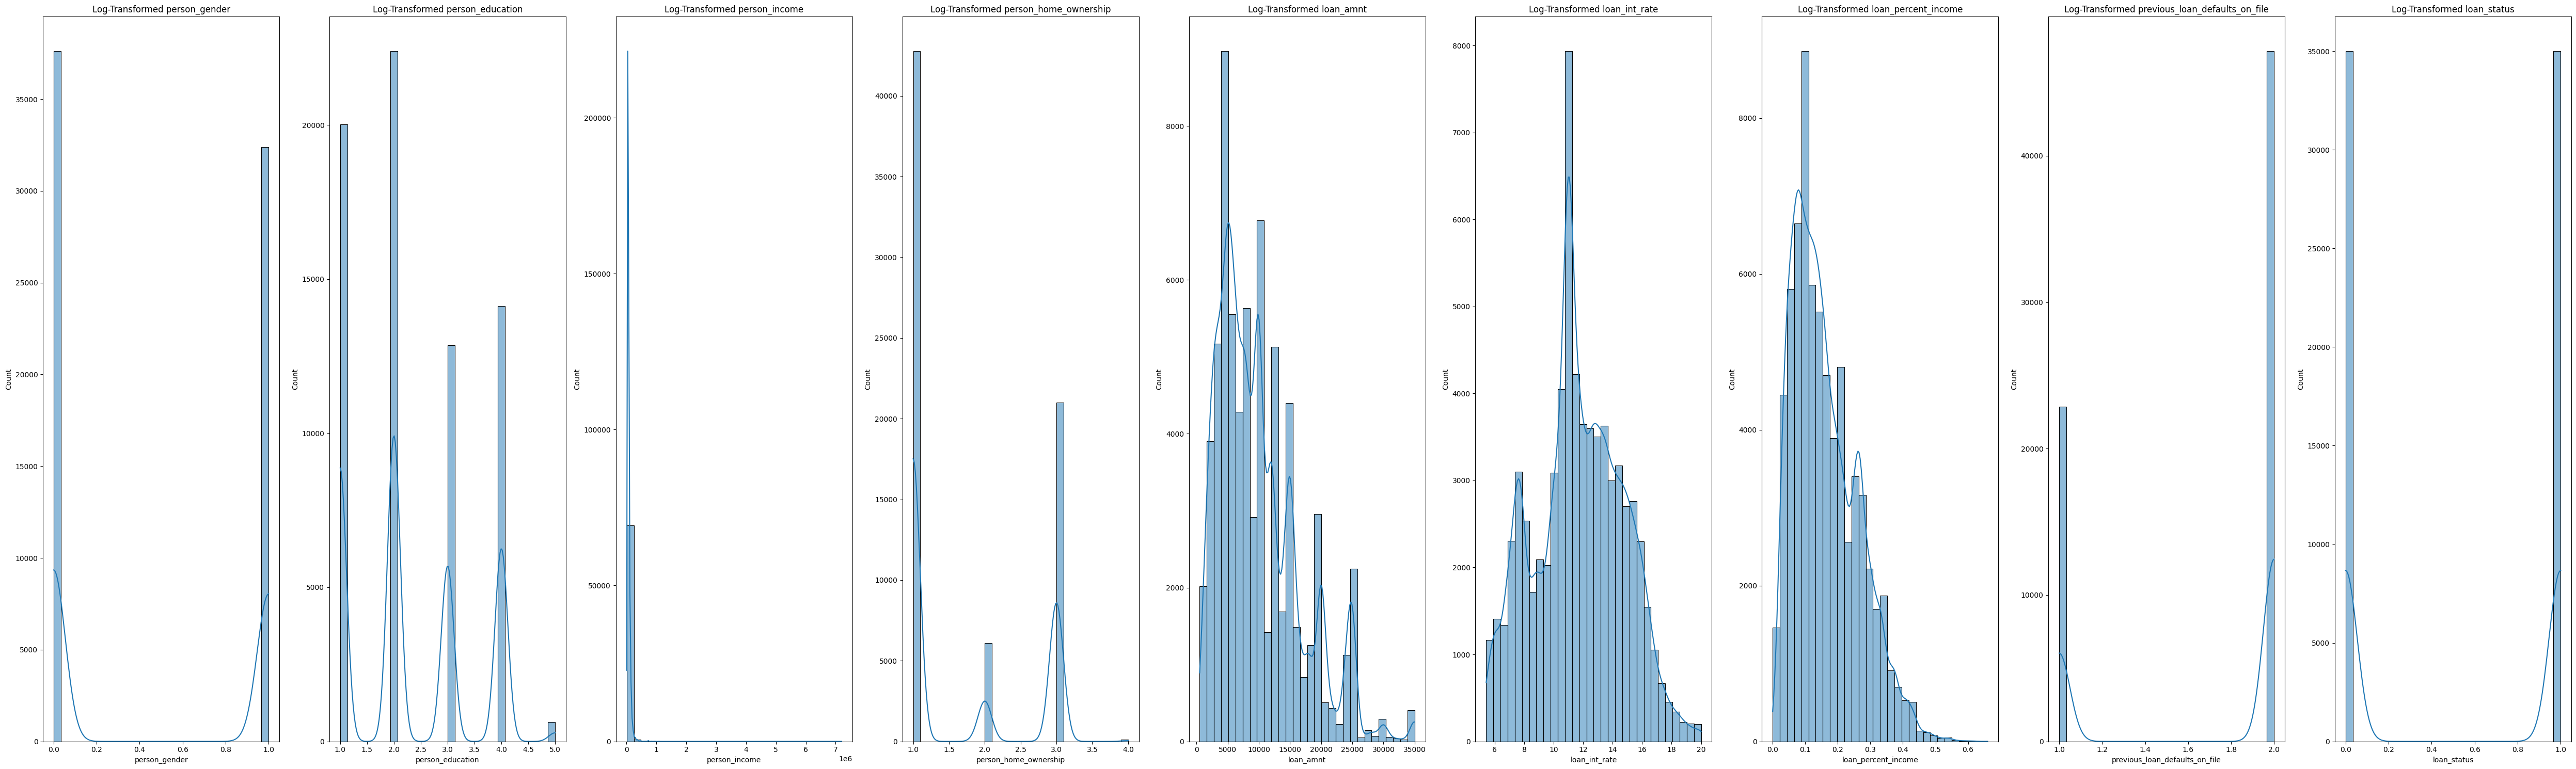

In [491]:
# Assuming df is a DataFrame with multiple features
num_features = df.shape[1]  # Number of features
plt.figure(figsize=(50, 15))  # Adjust the figure size as needed

for i, column in enumerate(df.columns, 1):
    plt.subplot(1, num_features, i)  # Adjust layout for each feature
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f"Log-Transformed {column}")

plt.tight_layout()
plt.show()

# **8. Dimensionality Reduction**

* The first line prepares the target column for binary classification.
* The next two lines split the data into features (x) and target (y), which are used to train a machine learning model.


In [492]:
data['loan_status'] = (data['loan_status'] > 0.5).astype(int)
x=data.drop(['loan_status'],axis=1)
y=data['loan_status']

 # **10. Initial Modelling and Hypothesis Testing**

In [493]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier,LogisticRegression
from sklearn.ensemble import RandomForestClassifier


* split your dataset into training and testing sets, which is a crucial step in building and evaluating machine learning models

In [494]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


* This is trains a Random Forest model using your training data, preparing it to make predictions on test or real-world data.



In [495]:
model=RandomForestClassifier()
model.fit(x_train,y_train)


RandomForestClassifier()

 * model's best guesses for the outcomes based on the test data.

In [496]:
y_pred=model.predict(x_test)
y_pred


array([1, 1, 0, ..., 0, 1, 1])

* helps you assess how well your classification model has done in terms of predicting the correct categories (disease or no disease) and allows you to visualize where it makes errors.


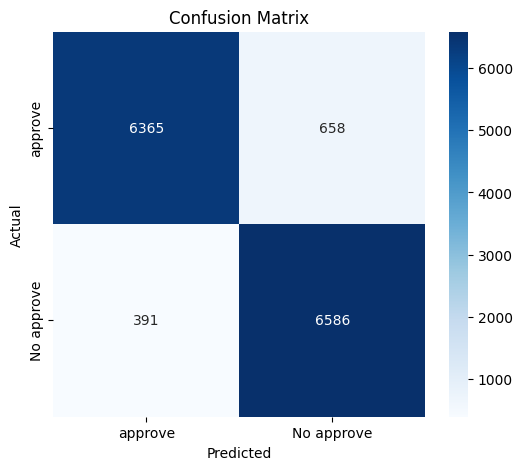

In [497]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['approve', 'No approve'], yticklabels=['approve', 'No approve'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

* These metrics are used to understand how well a model is performing from different perspectives (precision, recall, balance, and overall accuracy). This helps identify areas for improvement based on the problem's needs.


In [498]:
from sklearn.metrics import precision_score,recall_score, f1_score, accuracy_score

* takes input, predicts the likelihood of a heart condition, and displays the result.


In [499]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="weighted"))

print('Recall:', recall_score(y_test, y_pred, average="weighted"))

print('F1 Score:', f1_score(y_test, y_pred, average="weighted"))


Accuracy: 0.9250714285714285
Precision: 0.9257000097272708
Recall: 0.9250714285714285
F1 Score: 0.9250488652437256


In [500]:
df

,person_gender,person_education,person_income,person_home_ownership,loan_amnt,loan_int_rate,loan_percent_income,previous_loan_defaults_on_file,loan_status
0,0,3,71948.000000,1,35000.000000,16.020000,0.490000,2,1
1,0,1,12282.000000,2,1000.000000,11.140000,0.080000,1,0
2,0,1,12438.000000,3,5500.000000,12.870000,0.440000,2,1
3,0,2,79753.000000,1,35000.000000,15.230000,0.440000,2,1
4,1,3,66135.000000,1,35000.000000,14.270000,0.530000,2,1
...,...,...,...,...,...,...,...,...,...
69995,0,1,58632.677976,2,7220.332447,11.350065,0.120000,2,1
69996,1,3,15500.407609,1,3013.985195,9.759852,0.191865,2,1
69997,0,1,45602.814911,1,14348.424271,15.054132,0.316968,2,1
69998,1,3,43908.037190,2,5000.000000,14.019876,0.110000,2,1


* it helps predict loan approval based on the details you provide.

In [503]:
person_gender=float(input("Enter person_gender:"))
person_education=float(input("Enter person_education:"))
person_income=float(input("Enter person_income:"))
person_home_ownership=float(input("Enter person_home_ownership:"))
loan_amnt=float(input("Enter loan_amnt:"))
loan_int_rate=float(input("Enter loan_int_rate:"))
loan_percent_income=float(input("Enter loan_percent_income:"))
previous_loan_defaults_on_file=float(input("Enter previous_loan_defaults_on_file:"))
user_input=[[person_gender,person_education,person_income,person_home_ownership,loan_amnt,loan_int_rate,loan_percent_income,previous_loan_defaults_on_file]]
loan=model.predict(user_input)
print("loan: ",loan)

Enter person_gender:0
Enter person_education:2
Enter person_income:29
Enter person_home_ownership:30
Enter loan_amnt:31
Enter loan_int_rate:23
Enter loan_percent_income:45
Enter previous_loan_defaults_on_file:56
loan:  [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
